<a href="https://colab.research.google.com/github/Panuvat-Dan/Stabuck_analysis_loyalprediction/blob/main/Stabuck_loyal_customer_ML_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello my name is Panuvat Danvorapong and I am going to predict these dataset which I've pull from internet and I think it comes from Malaysia. Therefore, I can't find the reference please feel free to inbox if it is illegal data-set. 

**Ojective is to predict the loyal customer that they will continue loyaling to Starbuck or not by setting target variable as loyal and others such as timespending at shop,gender,how often you go to shop, income and so on to be features by using supervised machine learning algortihms which is lgoistic regrssion classification method.**

# 1.Data Preprocessing

## 1.1Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1.2Importing the dataset

In [4]:
dataset = pd.read_csv('Starbucks satisfactory survey.csv')
X = dataset.iloc[:, :-1].values # independent column
y = dataset.iloc[:, -1].values # target column

In [5]:
print(X)

[['2019/10/01 12:38:43 PM GMT+8' 'Female' 'From 20 to 29' ... 4 3
  'Starbucks Website/Apps;Social Media;Emails;Deal sites (fave, iprice, etc...)']
 ['2019/10/01 12:38:54 PM GMT+8' 'Female' 'From 20 to 29' ... 5 2
  'Social Media;In Store displays']
 ['2019/10/01 12:38:56 PM GMT+8' 'Male' 'From 20 to 29' ... 4 3
  'In Store displays;Billboards']
 ...
 ['2019/10/04 1:46:07 PM GMT+8' 'Male' 'From 20 to 29' ... 3 4
  'Social Media;Through friends and word of mouth;In Store displays']
 ['2019/10/05 11:01:14 AM GMT+8' 'Female' 'From 20 to 29' ... 4 4
  'Social Media;Through friends and word of mouth;Billboards']
 ['2019/10/05 4:57:22 PM GMT+8' 'Male' 'From 20 to 29' ... 3 2
  'In Store displays']]


In [6]:
print(y)

['Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No']


## 1.3Data exploration

#### 1.3.1 Explore basic descriptive statistic

In [10]:
dataset.shape

(122, 21)

In [8]:
dataset.describe()

,"12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,3.663934,2.893443,3.795082,3.754098,3.254098,3.745902,3.516393
std,0.941343,1.081836,1.090443,0.929867,0.958317,0.828834,1.030394
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
dataset.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,10. What do you most frequently purchase at Starbucks?,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


#### 1.3.2 Find missing data

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               122 non-null    object
 1   1. Your Gender                                                                                                          122 non-null    object
 2   2. Your Age                                                                                                             122 non-null    object
 3   3. Are you currently....?                                                                                               122 non-null    object
 4   4.

There are 7 numerical columns and 14 catagorical columns in this starbuck sastifactory dataset

In [13]:
dataset.isnull().sum()

Timestamp                                                                                                                 0
1. Your Gender                                                                                                            0
2. Your Age                                                                                                               0
3. Are you currently....?                                                                                                 0
4. What is your annual income?                                                                                            0
5. How often do you visit Starbucks?                                                                                      0
6. How do you usually enjoy Starbucks?                                                                                    1
7. How much time do you normally  spend during your visit?                                                                0
8. The n

There are 2 missing value in column 6 and 19

#### 1.3.3 Filter out indenpendent features by visualization several graphs

notethat : I' ll reduce the independent variables by selecting the important varaibles easiest way. However, we could apply Recursive Feature Elimination , or even Tree-based feature selection futhur for very complex features selection but for reducing complexity. Therefore, I am going to reduce independent variable. The better selection of feature, the better model of machine learning 

##### 1.3.3.1 Heatmap

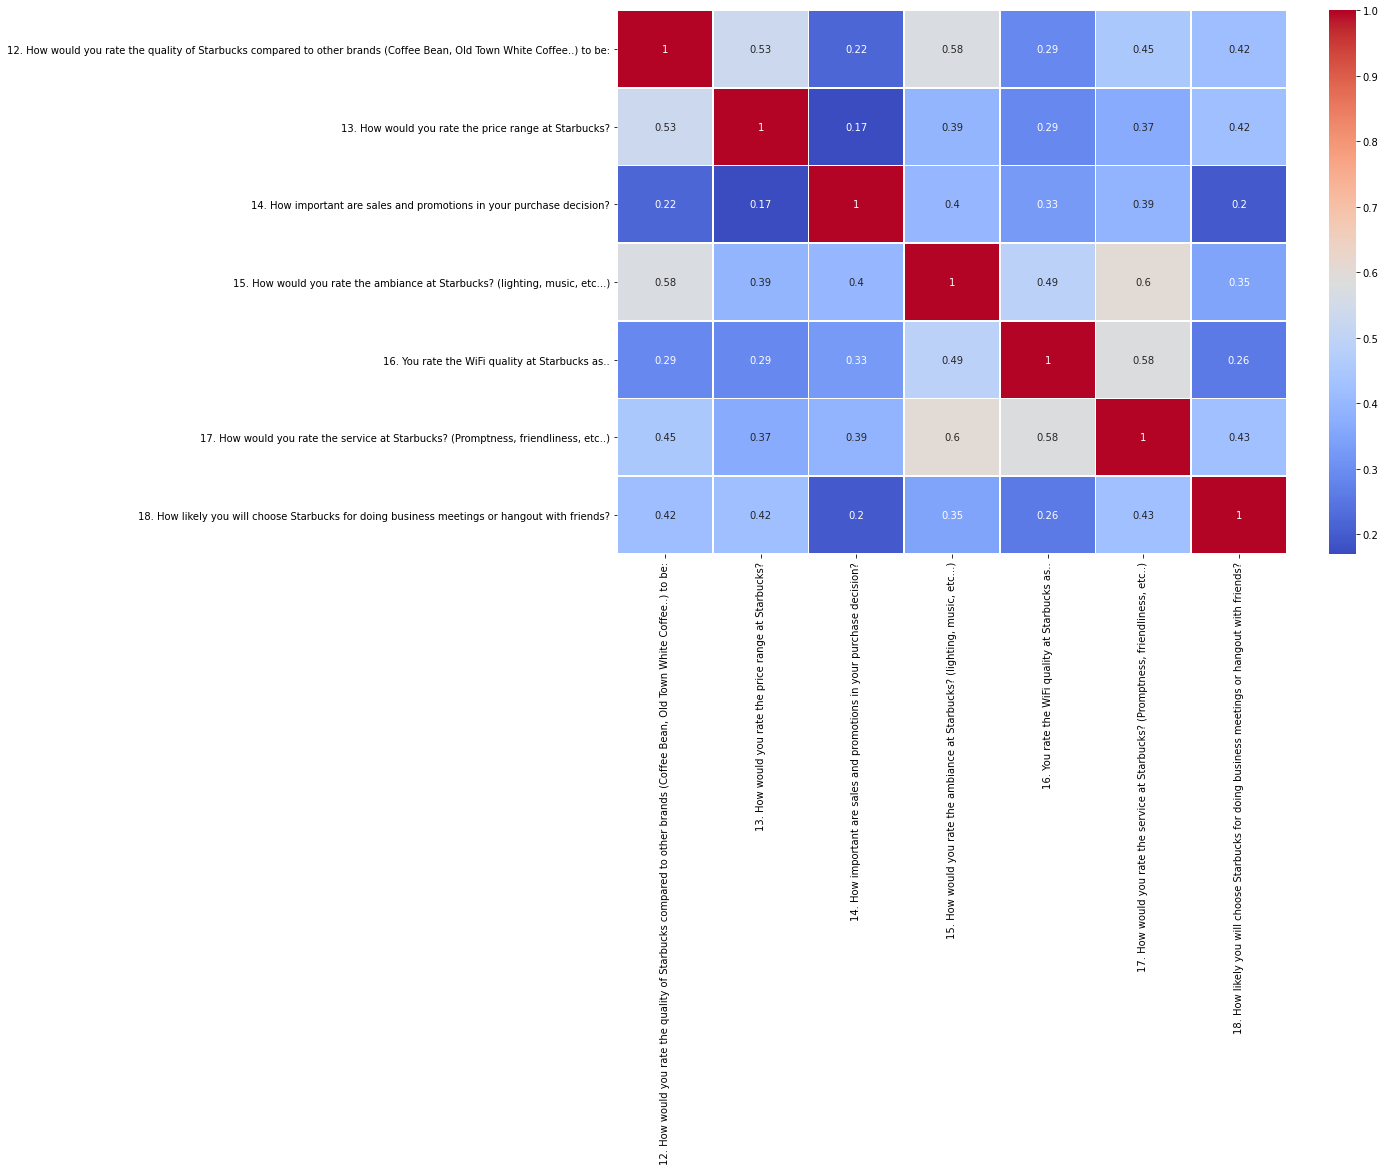

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True,linewidth=0.5,cmap='coolwarm')

##### 1.3.3.2 Quality rate VS loyalty

We shall see there are people who give a high quality rate of Starbuck product on both loyal and unloyal to Starbuck. Moreover, people who give low quality rate is never loyal to Starbuck.   

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


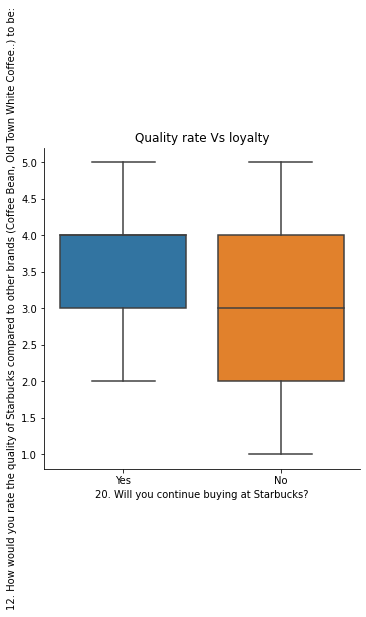

In [16]:
sns.factorplot(data=dataset,y='12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',x='20. Will you continue buying at Starbucks?',size=5,aspect=1,kind='box')
plt.title("Quality rate Vs loyalty")
plt.show()

##### 1.3.3.3 Price range VS loyalty

The interesting point is eventhough the Starbuck product is high,customers are still loyal to them.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


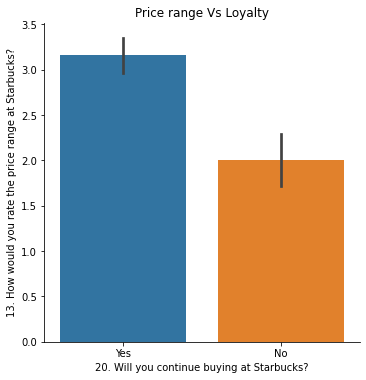

In [17]:
sns.factorplot(data=dataset,kind='bar',x='20. Will you continue buying at Starbucks?',y='13. How would you rate the price range at Starbucks?')
plt.title("Price range Vs Loyalty")
plt.show()

##### 1.3.3.4 Shop Environemt VS loyalty

As you show, You can see that the value Yes/ No is almost eqaul to each others. Therefore, it is litterally mean that shop environment does not affect to customer loyalty.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


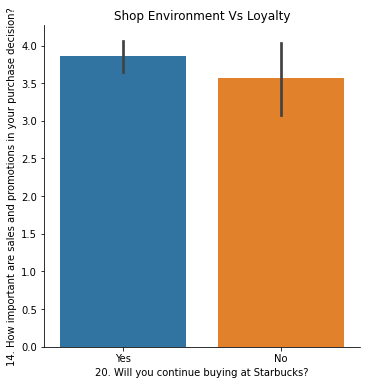

In [18]:
sns.factorplot(data=dataset,kind='bar',x='20. Will you continue buying at Starbucks?',y='14. How important are sales and promotions in your purchase decision?')
plt.title("Shop Environment Vs Loyalty")
plt.show()

##### 1.3.3.5 Wifi quality VS loyalty

As you show, You can see that the value Yes/ No is almost eqaul to each others. Therefore, it is litterally mean that wifi quality does not affect to customer loyalty.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


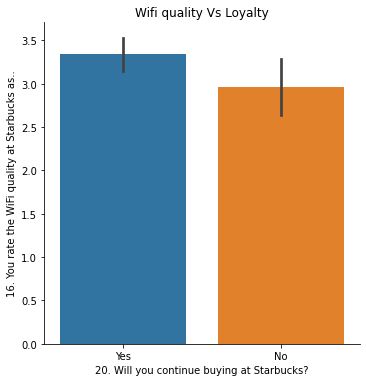

In [19]:
sns.factorplot(data=dataset,kind='bar',x='20. Will you continue buying at Starbucks?',y='16. You rate the WiFi quality at Starbucks as..')
plt.title("Wifi quality Vs Loyalty")
plt.show()

##### 1.3.3.6 Staff service VS loyalty

As you show, You can see that the value Yes/ No is almost eqaul to each others. Therefore, it is litterally mean that staff service does not affect to customer loyalty.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


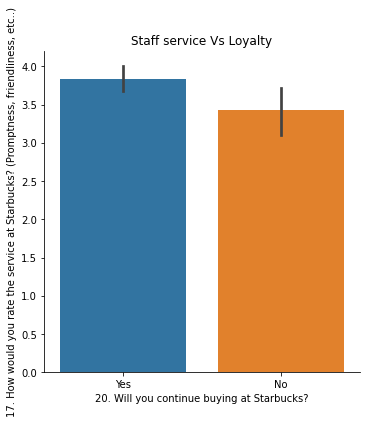

In [20]:
sns.factorplot(data=dataset,kind='bar',x='20. Will you continue buying at Starbucks?',y='17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)')
plt.title("Staff service Vs Loyalty")
plt.show()

#### 1.3.4 Feature Selection

Reduce the independent varaible columns and target variable 1 column

## 1.4Encoding categorical data

in this process, I am not going to do onehotendcoding or create any dummy variables becuase I've prepare the dataset which endcoded already and just going to import!! the easiest way for me to convert catagoric ot numeric and also cleaning the missing value easier because it does only 2 values.

Definition of numeric after converting catagoric to numeric data

**gender	value**

male	0

female	1
	
**age	value**

20-29	1

30-39	2

above 40	3
	
**status	value**

student	0

self-employed	1

employed	2

house-wife	3
	
**income	value**

more 25000 RM	0

25000 - 50000 RM	1

50000 - 100000 RM	2

100000 - 150000 RM	3

less 150000 RM	4
	
**visitinfo	value**

Daily	0

Weekly	1

Monthly	2

Rarely	3
	
**method	value**

dine-in	0

dirive-through	1

takeaway	2
	
**timespend	value**

below 30 mins	0

30 mins - 1 hr	1

1-2 hr	2

2-3 hr	3

between 3 hr	4
	
**location	value**

within 1km.	0

1-3km.	1

more than 3 km.	2

**membershipCard	value**

yes	0

no	1
	
**spendpurchase	value**

less than 20 RM	1

around 20-40 RM	2

more than 40 RM	3
	
**rate (price/ promotio / ambience / wifi / service / choose / )	value**

poor	1

general	2

fair	3

good	4

very good	5
	
**Others are catogorical datas and spliting into several columns**

### 1.4.1Encoding dependent Variables

In [63]:
encodedataset = pd.read_csv('Starbucks satisfactory survey encode cleaned.csv')
encodedataset.drop(['ambianceRate','wifiRate','serviceRate'], axis=1, inplace=True)
X = dataset.iloc[:,1:-1].values # independent column
y = dataset.iloc[:, -1].values # target column

In [64]:
print(X)

[['Female' 'From 20 to 29' 'Student' ... 4 3
  'Starbucks Website/Apps;Social Media;Emails;Deal sites (fave, iprice, etc...)']
 ['Female' 'From 20 to 29' 'Student' ... 5 2
  'Social Media;In Store displays']
 ['Male' 'From 20 to 29' 'Employed' ... 4 3
  'In Store displays;Billboards']
 ...
 ['Male' 'From 20 to 29' 'Student' ... 3 4
  'Social Media;Through friends and word of mouth;In Store displays']
 ['Female' 'From 20 to 29' 'Employed' ... 4 4
  'Social Media;Through friends and word of mouth;Billboards']
 ['Male' 'From 20 to 29' 'Employed' ... 3 2 'In Store displays']]


In [65]:
print(y)

['Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No']


### 1.4.2Encoding independent Variables

convert the catagorical data to numerical data

In [66]:
encodedataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Id                      113 non-null    int64
 1   gender                  113 non-null    int64
 2   age                     113 non-null    int64
 3   status                  113 non-null    int64
 4   income                  113 non-null    int64
 5   visitNo                 113 non-null    int64
 6   method                  113 non-null    int64
 7   timeSpend               113 non-null    int64
 8   location                113 non-null    int64
 9   membershipCard          113 non-null    int64
 10  itemPurchaseCoffee      113 non-null    int64
 11  itempurchaseCold        113 non-null    int64
 12  itemPurchasePastries    113 non-null    int64
 13  itemPurchaseJuices      113 non-null    int64
 14  itemPurchaseSandwiches  113 non-null    int64
 15  itemPurchaseOthers     

Now, you can see there is no missibng values

In [23]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
encodedataset["loyal"] = label.fit_transform(encodedataset.loyal)

In [24]:
encodedataset.info()
encodedataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Id                      113 non-null    int64
 1   gender                  113 non-null    int64
 2   age                     113 non-null    int64
 3   status                  113 non-null    int64
 4   income                  113 non-null    int64
 5   visitNo                 113 non-null    int64
 6   method                  113 non-null    int64
 7   timeSpend               113 non-null    int64
 8   location                113 non-null    int64
 9   membershipCard          113 non-null    int64
 10  itemPurchaseCoffee      113 non-null    int64
 11  itempurchaseCold        113 non-null    int64
 12  itemPurchasePastries    113 non-null    int64
 13  itemPurchaseJuices      113 non-null    int64
 14  itemPurchaseSandwiches  113 non-null    int64
 15  itemPurchaseOthers     

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,itemPurchaseCoffee,itempurchaseCold,itemPurchasePastries,itemPurchaseJuices,itemPurchaseSandwiches,itemPurchaseOthers,spendPurchase,productRate,priceRate,promoRate,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
0,1,1,1,0,0,3,0,1,0,0,1,1,1,1,1,1,1,4,3,5,3,1,1,1,1,1,1,1,1,0
1,2,1,1,0,0,3,2,0,1,0,1,1,1,1,1,1,1,4,3,4,2,1,1,1,1,1,1,1,1,0
2,3,0,1,2,0,2,0,1,2,0,1,1,1,1,1,1,1,4,3,4,3,1,1,1,1,1,1,1,1,0
3,4,1,1,0,0,3,2,0,2,1,1,1,1,1,1,1,1,2,1,4,3,1,1,1,1,1,1,1,1,1
4,5,0,1,0,0,2,2,1,1,1,1,1,1,1,1,1,2,3,3,4,3,1,1,1,1,1,1,1,1,0


## 1.5Splitting the dataset into the Training set and Test set

In [25]:
X = encodedataset.drop(['loyal'], axis = 1) #independent variable
y = encodedataset['loyal'] #dependent variable

In [26]:
print(X)

      Id  gender  ...  promoMethodBillboard  promoMethodOthers
0      1       1  ...                     1                  1
1      2       1  ...                     1                  1
2      3       0  ...                     1                  1
3      4       1  ...                     1                  1
4      5       0  ...                     1                  1
..   ...     ...  ...                   ...                ...
108  118       0  ...                     1                  1
109  119       0  ...                     1                  1
110  120       0  ...                     1                  1
111  121       1  ...                     1                  1
112  122       0  ...                     1                  1

[113 rows x 29 columns]


In [27]:
print(y)

0      0
1      0
2      0
3      1
4      0
      ..
108    0
109    0
110    1
111    0
112    1
Name: loyal, Length: 113, dtype: int64


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [29]:
print(X_train)

      Id  gender  ...  promoMethodBillboard  promoMethodOthers
54    58       0  ...                     1                  1
90    97       1  ...                     1                  1
33    34       1  ...                     1                  1
67    72       0  ...                     1                  1
48    52       1  ...                     1                  1
..   ...     ...  ...                   ...                ...
9     10       0  ...                     1                  1
72    77       0  ...                     1                  1
12    13       1  ...                     1                  1
107  117       0  ...                     1                  1
37    38       0  ...                     1                  1

[90 rows x 29 columns]


In [30]:
print(X_test)

      Id  gender  ...  promoMethodBillboard  promoMethodOthers
92    99       1  ...                     1                  1
44    48       1  ...                     1                  1
56    60       1  ...                     1                  1
82    88       1  ...                     1                  1
69    74       0  ...                     1                  1
104  114       1  ...                     1                  1
100  107       0  ...                     1                  1
58    62       1  ...                     1                  1
35    36       1  ...                     1                  1
38    39       0  ...                     1                  1
65    70       1  ...                     1                  1
93   100       0  ...                     1                  1
2      3       0  ...                     1                  1
101  110       0  ...                     1                  1
106  116       0  ...                     1            

In [31]:
print(y_train)

54     0
90     0
33     1
67     0
48     1
      ..
9      0
72     0
12     0
107    0
37     0
Name: loyal, Length: 90, dtype: int64


In [32]:
print(y_test)

92     0
44     0
56     0
82     0
69     0
104    0
100    0
58     0
35     1
38     0
65     0
93     0
2      0
101    1
106    0
53     0
99     0
96     0
91     0
42     0
74     1
17     0
78     0
Name: loyal, dtype: int64


## 1.6Feature Scaling

Change numeric value to Z-transformation to reduce the deviation from final dataset (Not include variable previously catagory because it might change the interpretion)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,:9] = sc.fit_transform(X_train.iloc[:,:9])
X_test.iloc[:,:9] = sc.transform(X_test.iloc[:,:9])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [34]:
print(X_train)

           Id    gender  ...  promoMethodBillboard  promoMethodOthers
54   0.043311 -1.045478  ...                     1                  1
90   1.144908  0.956501  ...                     1                  1
33  -0.634595  0.956501  ...                     1                  1
67   0.438756 -1.045478  ...                     1                  1
48  -0.126166  0.956501  ...                     1                  1
..        ...       ...  ...                   ...                ...
9   -1.312501 -1.045478  ...                     1                  1
72   0.579986 -1.045478  ...                     1                  1
12  -1.227763  0.956501  ...                     1                  1
107  1.709830 -1.045478  ...                     1                  1
37  -0.521611 -1.045478  ...                     1                  1

[90 rows x 29 columns]


In [35]:
print(X_test)

           Id    gender  ...  promoMethodBillboard  promoMethodOthers
92   1.201400  0.956501  ...                     1                  1
44  -0.239150  0.956501  ...                     1                  1
56   0.099803  0.956501  ...                     1                  1
82   0.890693  0.956501  ...                     1                  1
69   0.495248 -1.045478  ...                     1                  1
104  1.625091  0.956501  ...                     1                  1
100  1.427369 -1.045478  ...                     1                  1
58   0.156295  0.956501  ...                     1                  1
35  -0.578103  0.956501  ...                     1                  1
38  -0.493365 -1.045478  ...                     1                  1
65   0.382264  0.956501  ...                     1                  1
93   1.229646 -1.045478  ...                     1                  1
2   -1.510224 -1.045478  ...                     1                  1
101  1.512107 -1.045

# 2.Data modeling

## 2.1Logistic Regression method

In [73]:
from sklearn.linear_model import LogisticRegression # import supervior ML which is logisticregression
logis_regressor = LogisticRegression() # Create a logistic regression classifier 
logis_regressor.fit(X_train, y_train) # Train the model using the training sets 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
y_predict = logis_regressor.predict(X_test) # predict on the test data

In [75]:
print(y_predict)

[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


# 3.Data evaluation

## 3.1 Evaluation of logistic regression

In [73]:
from sklearn import metrics
logis_accur = round( metrics.accuracy_score(y_test, y_predict) * 100, 2 )
print( 'Total Accuracy : ', logis_accur )
print( 'Precision : ', round( metrics.precision_score(y_test, y_predict) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_predict) * 100, 2 ) )

Total Accuracy :  91.3
Precision :  66.67
Recall :  66.67


Feature: 0, Score: 0.32649
Feature: 1, Score: 0.37498
Feature: 2, Score: -0.24681
Feature: 3, Score: -0.31828
Feature: 4, Score: 0.57717
Feature: 5, Score: 1.00607
Feature: 6, Score: -0.00688
Feature: 7, Score: 0.83002
Feature: 8, Score: -0.07278
Feature: 9, Score: 0.73141
Feature: 10, Score: -0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: -0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: -0.00000
Feature: 16, Score: -1.41350
Feature: 17, Score: -0.45048
Feature: 18, Score: -1.21835
Feature: 19, Score: 0.02379
Feature: 20, Score: -0.47683
Feature: 21, Score: -0.00000
Feature: 22, Score: -0.00000
Feature: 23, Score: -0.00000
Feature: 24, Score: -0.00000
Feature: 25, Score: -0.00000
Feature: 26, Score: -0.00000
Feature: 27, Score: -0.00000
Feature: 28, Score: -0.29510


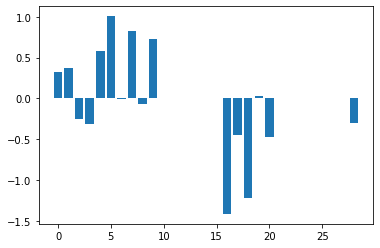

In [49]:
# get features importance
importance = logis_regressor.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [50]:
encodedataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Id                      113 non-null    int64
 1   gender                  113 non-null    int64
 2   age                     113 non-null    int64
 3   status                  113 non-null    int64
 4   income                  113 non-null    int64
 5   visitNo                 113 non-null    int64
 6   method                  113 non-null    int64
 7   timeSpend               113 non-null    int64
 8   location                113 non-null    int64
 9   membershipCard          113 non-null    int64
 10  itemPurchaseCoffee      113 non-null    int64
 11  itempurchaseCold        113 non-null    int64
 12  itemPurchasePastries    113 non-null    int64
 13  itemPurchaseJuices      113 non-null    int64
 14  itemPurchaseSandwiches  113 non-null    int64
 15  itemPurchaseOthers     